### Exploratory Data Analysis

This notebook explores a published dataset containing anomalies related to a 5G network. The dataset was created considering the 3GPP specifications. Moreover, this notebook contains the column descriptions and details.

Paper: https://s3.ap-northeast-2.amazonaws.com/journal-home/journal/jcn/fullText/421/10.pdf </br>
Dataset: https://github.com/sevgicansalih/nwdaf_data/blob/master/nwdaf_data.csv

The generated 5G dataset includes a topology with a fixed number of cells for a fixed number of subscriber categories, where different types of devices that have different traffic patterns (e.g., cell phone, vehicle) can connect to the network. 

The authors modeled each cell using a set of features that they retrieved from other NFs: Bytes transmitted during the monitoring time, list of categories associated with the subscriber, personal equipment ID, and network area information (i.e., RRU cell ID).

Also, in order to make the synthetic 5G dataset more realistic, the authors included anomalies, such as unexpectedly increasing data traffic through a particular RRU cell.

The below figure illustrates the network topology.

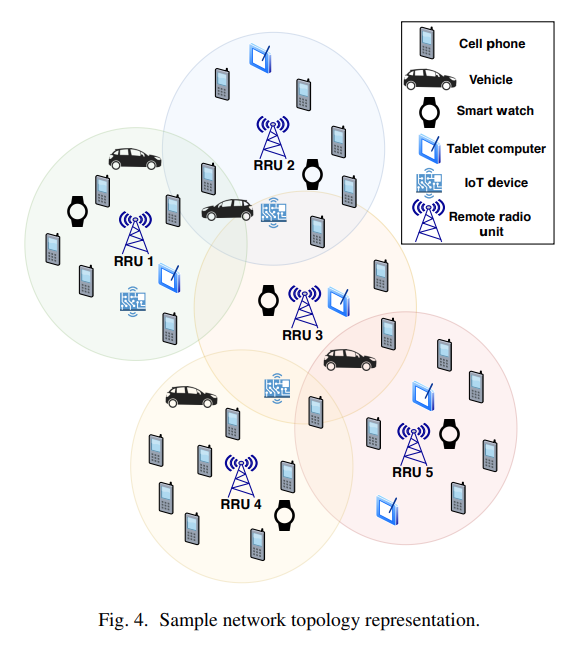

### Importing libraries

In [1]:
import pandas as pd

### Load data

In [2]:
df = pd.read_csv('../data/nwdaf_data.csv')

In [3]:
df.head()

,t,cell_id,cat_id,pe_id,load,has_anomaly
0,0,0,0,0,4.997074,0
1,0,0,0,1,16.004322,0
2,0,0,0,2,52.985386,0
3,0,0,0,3,0.999767,0
4,0,0,0,4,5.000597,0


### Dataset information and description

Columns description:
- t: Timestamp ID
- cell_id: RRU ID (RRU 1, RRU 2, RRU 3, RRU 4, and RRU 5)
- cat_id: Subscriber Categories (Platinum, Gold, and Silver)
- pe_id: Personal/User Equipment ID (IoT Device, Vehicle, Cell Phone, Smartwatch, and Tablet Computer)
- load: Network Load Performance (Amount of transmitted data in bytes for a certain period of time)
- has_anomaly: Indication of anomaly in this timestamp

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296000 entries, 0 to 1295999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   t            1296000 non-null  int64  
 1   cell_id      1296000 non-null  int64  
 2   cat_id       1296000 non-null  int64  
 3   pe_id        1296000 non-null  int64  
 4   load         1296000 non-null  float64
 5   has_anomaly  1296000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 59.3 MB


In [5]:
# ids representing the 5 RRUs
df['cell_id'].value_counts()

0    259200
1    259200
2    259200
3    259200
4    259200
Name: cell_id, dtype: int64

In [6]:
# id representing the 3 subscriber categories: platinum, gold, and silver
# The logic behind these three subscriptions is to make the generated data more realistic because mobile service providers sell these kinds of subscriptions in the real world
df['cat_id'].value_counts()

0    432000
1    432000
2    432000
Name: cat_id, dtype: int64

In [7]:
# types of personal equipment (i.e., user equipment), namely, IoT device, vehicle, cell phone, smartwatch, and tablet computer
df['pe_id'].value_counts()

0    259200
1    259200
2    259200
3    259200
4    259200
Name: pe_id, dtype: int64

The simulated network traffic considered the device types and time. The amount of traffic by device depends on the time of the day, considering the rush hours, night time, amont others. The exception is the IoT devices, which because these devices are not expected to move as much as other personal equipment.

The authors generated six months long network traffic data, which consist of a network snapshot in each 15 minutes interval (∆t). In each of these intervals, UE may handover between adjacent cells.

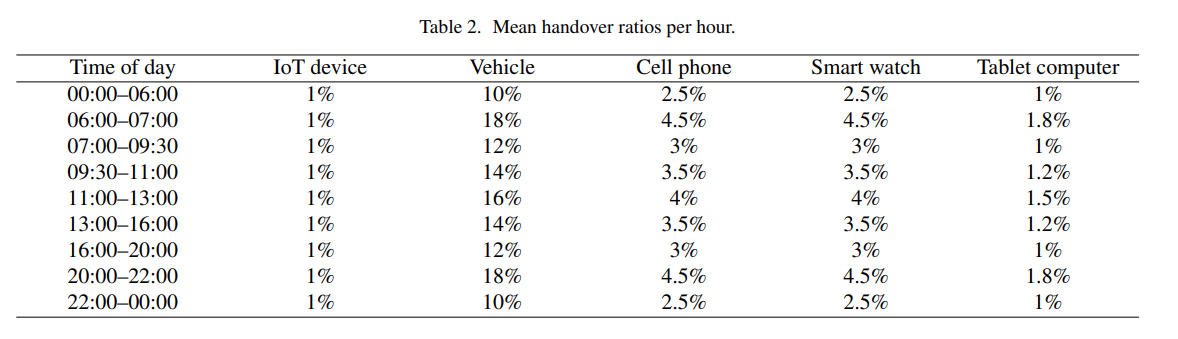

Different loads are assigned for each personal equipment type as well as each subscriber category. The logic behind these load values is that it is more likely for a user to subscribe to the platinum category rather than gold and silver categories for the cell phone subscription. On the other hand, it is less likely to subscribe to a higher category for a tablet computer, vehicle, and IoT device.

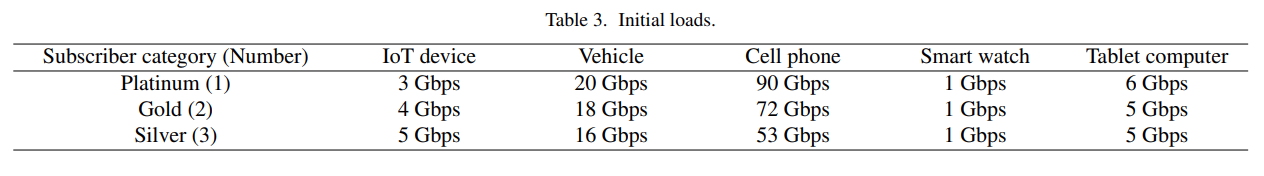

cat_id:
- 0: Silver
- 1: Gold
- 2: Platinum

pe_id:
- 0: IoT
- 1: Vehicle
- 2: Cell Phone
- 3: Smartwatch
- 4: Tablet Computer

In [8]:
group_columns = ['t', 'cell_id', 'cat_id', 'pe_id']
sum_columns = ['load']
t = 0
rru = 0
df[(df['t'] == t) & (df['cell_id'] == rru)][group_columns + sum_columns].groupby(group_columns, as_index=False).sum(sum_columns)

,t,cell_id,cat_id,pe_id,load
0,0,0,0,0,4.997074
1,0,0,0,1,16.004322
2,0,0,0,2,52.985386
3,0,0,0,3,0.999767
4,0,0,0,4,5.000597
5,0,0,1,0,4.000540
6,0,0,1,1,17.933945
7,0,0,1,2,71.985034
8,0,0,1,3,0.998595
9,0,0,1,4,5.003730


In [9]:
group_columns = ['t', 'cell_id', 'cat_id', 'pe_id']
sum_columns = ['load']
t = 0
rru = 1
df[(df['t'] == t) & (df['cell_id'] == rru)][group_columns + sum_columns].groupby(group_columns, as_index=False).sum(sum_columns)

,t,cell_id,cat_id,pe_id,load
0,0,1,0,0,5.002402
1,0,1,0,1,16.009495
2,0,1,0,2,53.099630
3,0,1,0,3,1.000895
4,0,1,0,4,4.998943
5,0,1,1,0,4.000447
6,0,1,1,1,17.998906
7,0,1,1,2,71.964601
8,0,1,1,3,1.000479
9,0,1,1,4,5.002696


In order to make the dataset more realistic, the authors added anomalies to the generated network traffic data throughout the simulation. They describe anomalies as unexpectedly generated large amounts of network traffic compared to the average network traffic, which fades and stabilizes in time. While creating these kinds of anomalies, they were inspired by our daily lives, where constantly some videos go viral or some breaking news occurs, which affects the network traffic data in an increasing manner.

In [10]:
df[df['has_anomaly'] == 1].head(10)

,t,cell_id,cat_id,pe_id,load,has_anomaly
150,2,0,0,0,5.003721,1
151,2,0,0,1,16.232611,1
152,2,0,0,2,53.110539,1
153,2,0,0,3,1.002525,1
154,2,0,0,4,5.015411,1
155,2,0,1,0,4.010465,1
156,2,0,1,1,17.971349,1
157,2,0,1,2,72.261822,1
158,2,0,1,3,1.001239,1
159,2,0,1,4,5.016756,1


In [11]:
# RRU 0, Silver, IoT
df[(df['cell_id'] == 0) & (df['cat_id'] == 0) & (df['pe_id'] == 0)].head(10)

,t,cell_id,cat_id,pe_id,load,has_anomaly
0,0,0,0,0,4.997074,0
75,1,0,0,0,4.997780,0
150,2,0,0,0,5.003721,1
225,3,0,0,0,5.002989,1
300,4,0,0,0,5.009872,1
375,5,0,0,0,5.008530,1
450,6,0,0,0,5.030774,1
525,7,0,0,0,5.032476,1
600,8,0,0,0,5.072980,1
675,9,0,0,0,5.070815,1


In [12]:
# RRU 0, Silver, Cell Phone
df[(df['cell_id'] == 0) & (df['cat_id'] == 0) & (df['pe_id'] == 2)].head(10)

,t,cell_id,cat_id,pe_id,load,has_anomaly
2,0,0,0,2,52.985386,0
77,1,0,0,2,52.983510,0
152,2,0,0,2,53.110539,1
227,3,0,0,2,53.164703,1
302,4,0,0,2,53.349475,1
377,5,0,0,2,53.373232,1
452,6,0,0,2,53.639862,1
527,7,0,0,2,53.618563,1
602,8,0,0,2,54.086352,1
677,9,0,0,2,54.086486,1
